# DSCI 572 "lecture" 4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from gd_plot_utils import *

In [3]:
# plt.rcParams['font.size'] = 16

#### Outline:

- SGD: recap, minibatches, and epochs (20 min)
- Visualizing GD and SGD trace plots (15 min)
- Break (5 min)
- Gradient descent learning rate demo (15 min)
- True/False (25 min)

## SGD: recap, minibatches, and epochs (20 min)

#### Recap

- Stochastic gradient descent (SGD) is a variant of gradient descent in which a subset of data is used at each iteration.
- This subset of data is called a "batch" or "minibatch".
- SGD has different theoretical properties than GD, which we won't go into here.

#### Batch size, iterations, and epochs:

The most confusion I see with students is going between iterations and epochs.

- Let's define an iteration as each time you update the weights.
- Let's define an epoch as the number of iterations it takes to look at $n$ examples.
  - People also say things like "full pass through the dataset" or "you have looked at all training examples once".
  - But our definition will be a bit more precise, with the "replacement" discussion coming below.

Then...

- With GD, each iteration involves computing the gradient, which involves a sum over all examples.
- Thus we say each iteration involves a "full pass through the dataset".
- So, we could say for GD that each iteration is an epoch. # of iterations = # of epochs.
- With SGD, each iteration involves a subset of the data.
  - What fraction of the data, you might ask?
  - Well, batchsize/n.
  - E.g. if $n=1000$ and the batch size is $10$, then it's 1/100 or 1% of the whole training data each time.
  - Thus, we'd need to do $100$ iterations to get to an epoch.
  - In general, iterations per epoch = n/batchsize. 
  - This given us a formula:
  
$$\frac{\text{number of iterations}}{\text{number of epochs}}=\frac{n}{\text{batch size}}$$

We often end up solving for one of these.

- So, why do we bother with all this hassle??
- Because we want a quantity to talk about that is meaningful to humans.
- "I did 10 iterations of gradient descent" means something to me.
- "I did 10 iterations of stochastic gradient descent" means nothing to me.
  - That could be a lot, if the batch size is huge and/or $n$ is small
  - That could be nothing, if the batch size is small and/or $n$ is large.
- "I did 10 epochs of stochastic gradient descent" has more meaning to me. 


#### Termination

- We don't use the same termination condition as gradient descent, for several reasons, including:
  - Slow to check the full gradient
  - We may have lower expectations about convergence when using such big data sets
- So often we just want to specify a number of iterations

#### Learning rate

- According to the theory, we need to decrease $\alpha$ over time, following certain guidelines.
- In reality, often people leave $\alpha$ constant and things tend to work out.
- Also in reality, we use fancier variants of SGD, such as Adam, which set $\alpha$ in a more sophisticated way.
  - If you're interested in reading more, see e.g. [here](https://ruder.io/optimizing-gradient-descent/) (though this article is from 4 years ago, which is quite old.)

#### With/without replacement:

There are some implementation details that we aren't going to worry about too much, regarding whether the batches sampled with or without replacement.

1. Approach 1: you shuffle the dataset and pre-divide it into batches, like cross-validation. This is fully without replacement.
2. Approach 2: you just sample a batch each time, so you might have the same example in both batch 1 and batch 2. But each batch itself is sampled without replacement.
3. Approach 3: like Approach 2, but even each batch is sampled with replacement, so you might have the same example twice in batch 1.

You should use Approach 1 or Approach 2 in the lab. With Approach 3, setting the batch size to $n$ will not give you back regular gradient descent. 

#### Advantages of SGD

- It is often much faster for big datasets.
- "Why spend all that time picking a direction for your step? An approximate direction seems fine"
- It's a generaliztaion of GD. 
- **If your training data does not fit into memory, SGD still works - you just need to fit a batch in memory.**
  - More on this later in the course - we'll come back to generators.

## Visualizing GD and SGD (15 min)

Attribution: some of these plots were made/improved by a former MDS student, Shun Chi.

In [4]:
np.random.seed(123)

def gen_outlier_data(n=40,Noutliers=3):
    
    # generate random data
    x = np.random.randn(n)+2
    y = 11*x - 1 + np.random.randn(n)*10
    # add random outliers
    y[:Noutliers] = -100*(x[:Noutliers]+np.random.randn(Noutliers))

    return x,y

x,y = gen_outlier_data()
X = x[:,None] # reshape for sklearn

# X_1 = np.concatenate((X, np.ones(X.shape[0])[:,None]),axis=1)

### Visualize data

[7.1227413]
-14.36747606469147


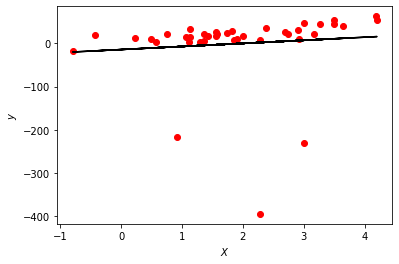

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

plt.plot(x, y, "ro")
plt.plot(x, lr.coef_*x+lr.intercept_,'k')
plt.xlabel('$X$')
plt.ylabel('$y$');

Loss function again with contours

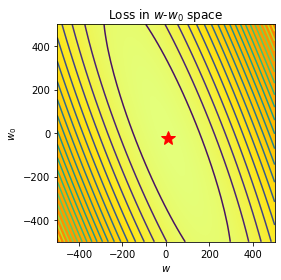

In [6]:
squared_loss_fun = lambda pred, y: np.sum((pred-y[:,None])**2,axis=0)

plot_loss(squared_loss_fun, X, y)

#### Visualize the parameters' path with gradient descent

In [7]:
w0 = 100
β0 = 300
α = 0.1
Nsteps = 15

w = -59.777277
β = 153.140078


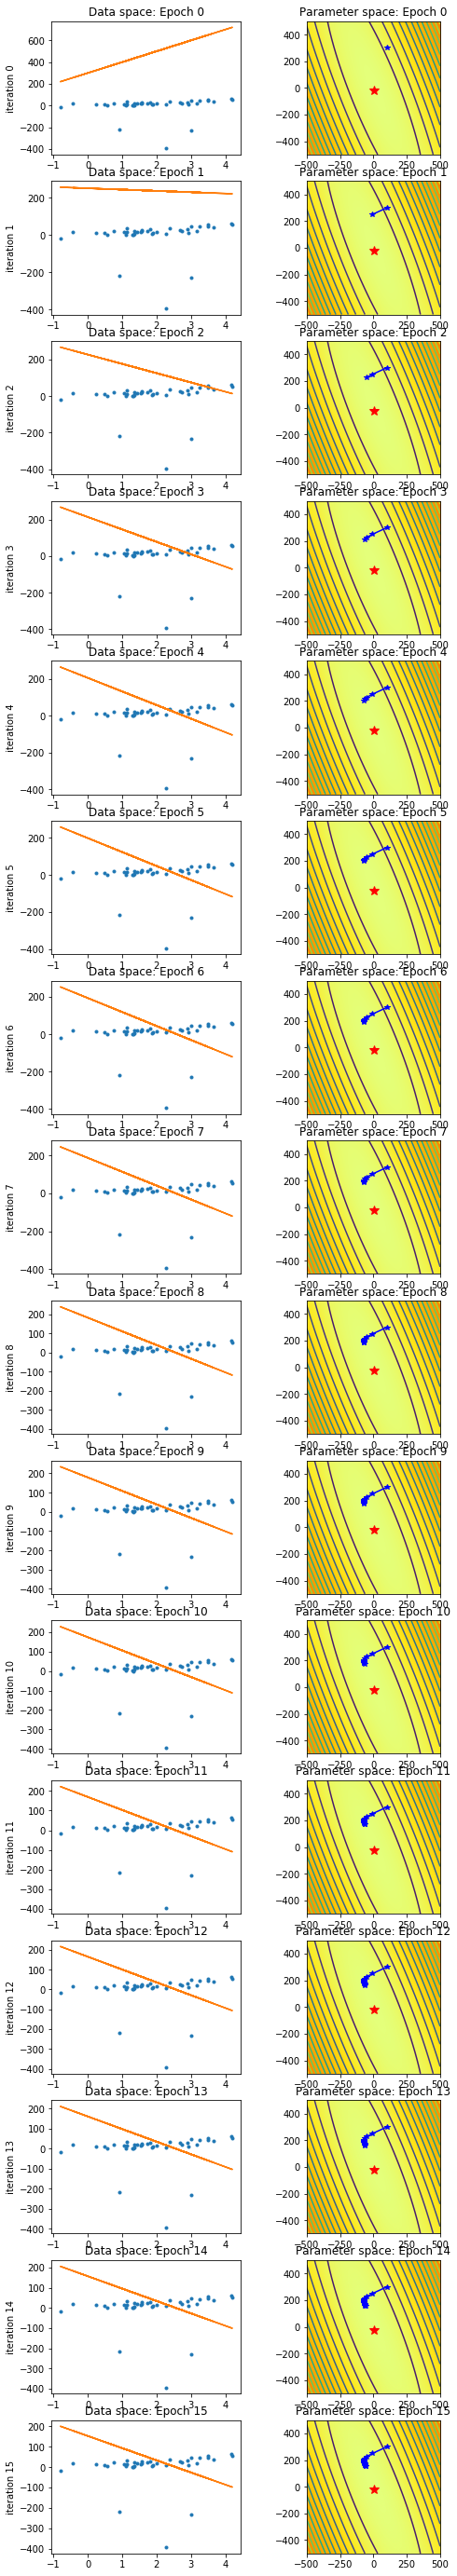

In [8]:
def gd_plotting(w0, β0, α, Nsteps, x, y):
    w = w0
    β = β0

    w_gd = [w]
    β_gd = [β]

    plt.figure(figsize=(8, 20))
    make_plot_pairs(w_gd,β_gd,0,Nsteps, x, y, titles=True)

    for t in range(Nsteps):
        dLdw = np.mean(x*(w*x+β-y))
        dLdβ = np.mean(w*x+β-y)
        w -= α*dLdw
        β -= α*dLdβ

        w_gd.append(w)
        β_gd.append(β)

        make_plot_pairs(w_gd,β_gd,t+1, Nsteps, x,y, titles = True)

    return w_gd, β_gd

w_gd, β_gd = gd_plotting(w0, β0, α, Nsteps, x, y)

print("w = %f" % w_gd[-1])
print("β = %f" % β_gd[-1])

- Above: GD moves very slowly down that centre line, where the gradient is very small.
  - An adaptive learning rate would make it work much better (beyond the scope of this course).

- Below: the loss vs. iterations.

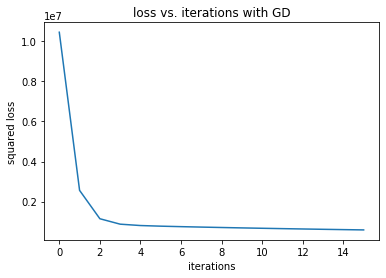

In [9]:
losses_gd = squared_loss_fun(X @ np.array(w_gd)[None] + np.array(β_gd)[None], y)
plt.plot(np.arange(Nsteps+1), losses_gd);
plt.ylabel('squared loss');
plt.xlabel('iterations');
plt.title('loss vs. iterations with GD');

What happens if we use a larger learning rate?

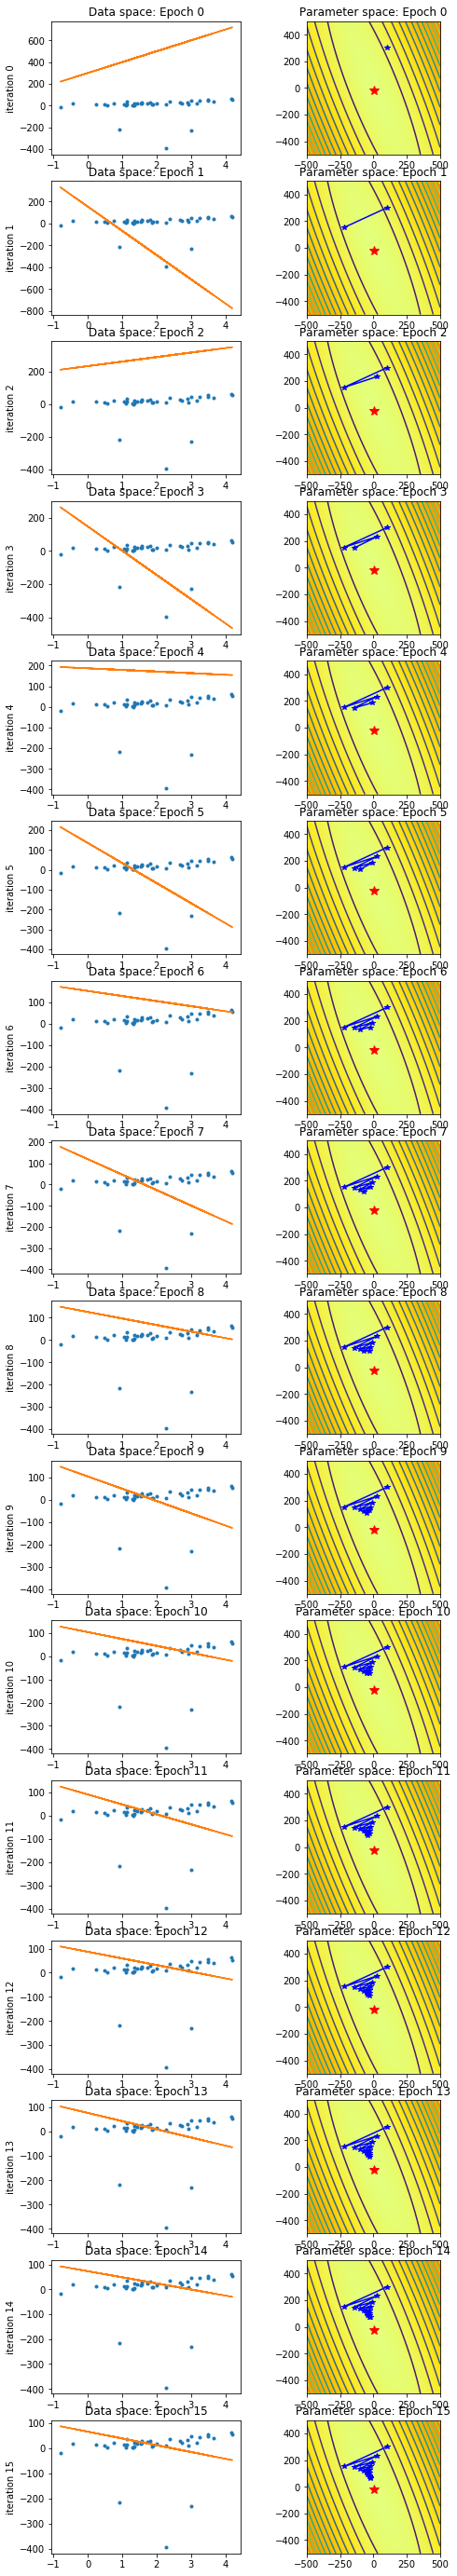

In [10]:
_, _ = gd_plotting(w0, β0, 0.3, Nsteps, x, y)

#### Visualize the parameters' path with SGD

In [11]:
α = 0.1

w = 21.445340
β = -1.511338


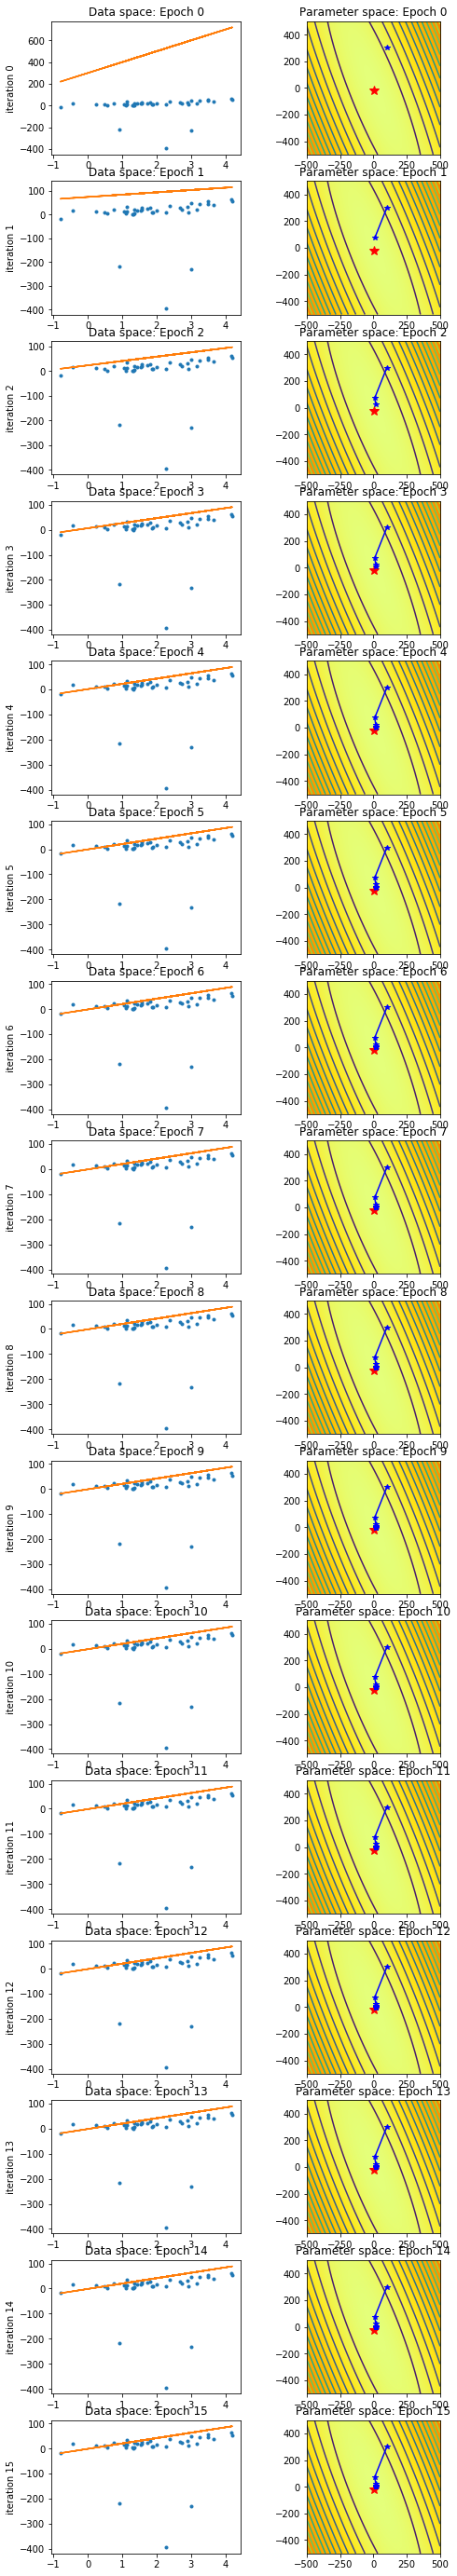

In [15]:
def sgd_plotting(w0, β0, α, Nsteps, x, y):
    w = w0
    β = β0
    
    w_sgd = [w]
    β_sgd = [β]

    # shuffle the data
    ind = np.random.choice(len(y), size=len(y), replace=False)
    x_shuffle = x[ind]
    y_shuffle = y[ind]

    plt.figure(figsize=(8, 20))
    make_plot_pairs(w_sgd,β_sgd,0,Nsteps, x_shuffle, y_shuffle, titles=True)

    for t in range(Nsteps):
        for i in range(len(X)):
            index = i # np.random.randint(len(X))
            dLdw = x_shuffle[index]*(w*x_shuffle[index]+β-y_shuffle[index])
            dLdβ = w*x_shuffle[index]+β-y_shuffle[index]
            w -= α*dLdw
            β -= α*dLdβ

        # just store them every epoch
        w_sgd.append(w)
        β_sgd.append(β)

        make_plot_pairs(w_sgd,β_sgd,t+1,Nsteps, x_shuffle, y_shuffle, titles=True) #  figheight=10, 
        
    return w_sgd, β_sgd

w_sgd, β_sgd = sgd_plotting(w0, β0, α, Nsteps, x, y)

print("w = %f" % w_sgd[-1])
print("β = %f" % β_sgd[-1])

- Above: SGD quickly gets near the minimum, then bounces around there.

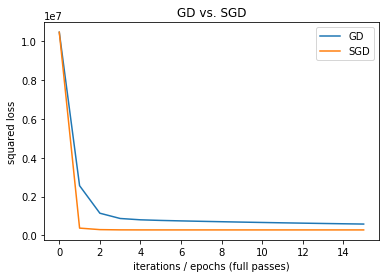

In [13]:
losses_sgd = squared_loss_fun(X @ np.array(w_sgd)[None] + np.array(β_sgd)[None], y)
plt.plot(np.arange(Nsteps+1), losses_gd, label="GD");
plt.plot(np.arange(Nsteps+1), losses_sgd, label="SGD");
plt.ylabel('squared loss');
plt.xlabel('iterations / epochs (full passes)');
plt.title('GD vs. SGD');
plt.legend();

- The above plotting shows the situation after each epoch. 
- Below, we plot each **iteration**:

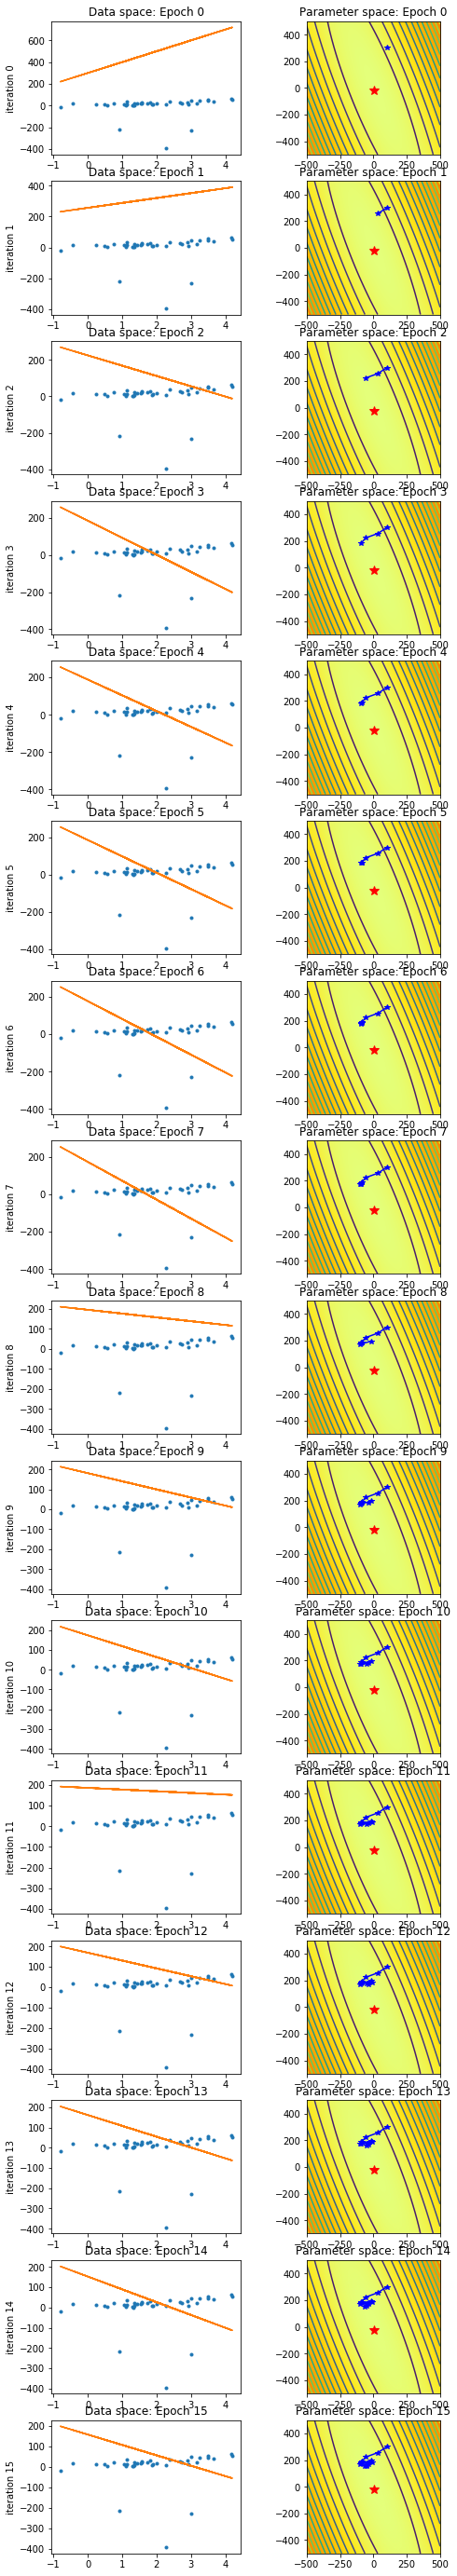

In [16]:
def sgd_plotting_iter(w0, β0, α, Niter, x, y):
    w = w0
    β = β0
    
    w_sgd = [w]
    β_sgd = [β]

    # shuffle the data
    ind = np.random.choice(len(y), size=len(y), replace=False)
    x_shuffle = x[ind]
    y_shuffle = y[ind]
    
    plt.figure(figsize=(8, 20))
    make_plot_pairs(w_sgd,β_sgd,0,Niter, x_shuffle, y_shuffle, titles=True)

    for i in range(Niter):
        index = i # np.random.randint(len(X))
        dLdw = x_shuffle[index]*(w*x_shuffle[index]+β-y_shuffle[index])
        dLdβ = w*x_shuffle[index]+β-y_shuffle[index]
        w -= α*dLdw
        β -= α*dLdβ

        w_sgd.append(w)
        β_sgd.append(β)

        make_plot_pairs(w_sgd,β_sgd,i+1,Niter, x_shuffle, y_shuffle, titles=True) #  figheight=10, 
        
    return w_sgd, β_sgd

_, _ = sgd_plotting_iter(w0, β0, α, 15, x, y)

## Break (5 min)

## Gradient descent: learning rate demo (15 min)


In [18]:
np.random.seed(0)

d = 10
n = 1000
X = np.random.randn(n,d) * 0.01 # making this smaller means the learning rate you need is larger; making this larger causes training to diverge
y = X @ np.random.randn(d,1)

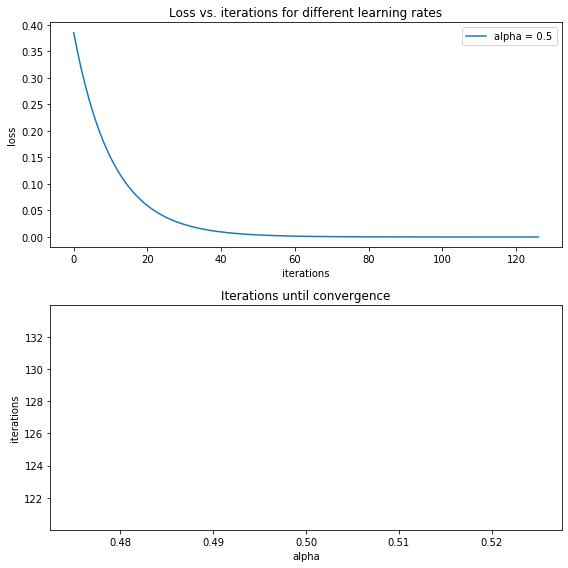

In [19]:
make_alpha_plots(2.0**np.arange(-1,0), X, y)

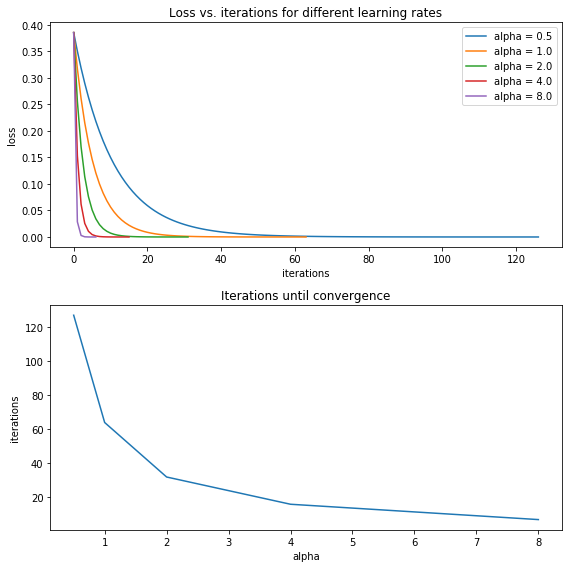

In [20]:
make_alpha_plots(2.0**np.arange(-1,4), X, y)

Above: it seems larger `alpha` leads to faster convergence. But the plot thickens...

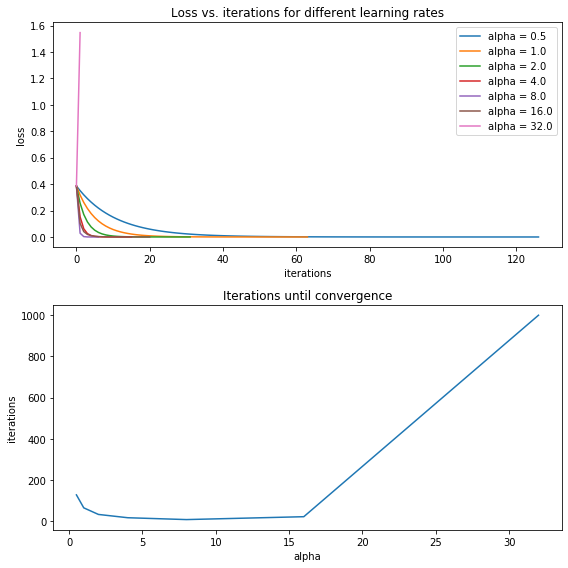

In [21]:
make_alpha_plots(2.0**np.arange(-1,6), X, y)

Above: when $\alpha$ is too big, the sequence never converges.

(Optional) And an interesting case:

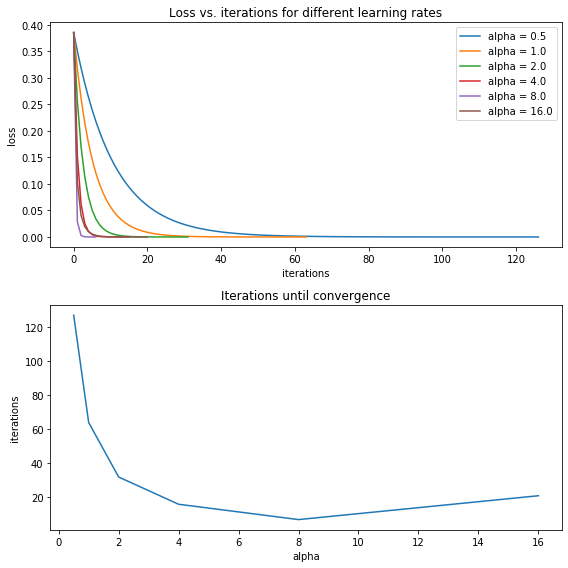

In [22]:
make_alpha_plots(2.0**np.arange(-1,5), X, y)

(Optional) Above: although training does not diverge when $\alpha=16$, it is slower than $\alpha=8$. This is presumably due to "bouncing around" in parameter space.

## True/false - stochastic gradient (25 min)

1. For stochastic gradient to work, we need to increase the step size as the optimization proceeds.
2. Stochastic gradient can be used for training many models, including linear regression and KNN.
3. An iteration of stochastic gradient might cause the loss might go up, even for a very small learning rate.
4. It is reasonable to check whether the loss went up or down after each iteration of stochastic gradient.

<br><br><br><br><br><br><br><br><br>

1. Increasing the batch size results in slower, but better, iterations.
2. If you double the number of epochs and double the batch size, then nothing has changed.
2. One epoch of stochastic gradient takes about the same amount of time as one iteration of gradient descent.
3. Stochastic gradient with a minibatch size of $n$ is the same thing as gradient descent.
4. For one epoch, increasing the batch size makes the code slower.